In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor, LinearRegression, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# finding out the major factors that affect the quality of coffee!

In [2]:
dataset = pd.read_csv("C:\\Users\\HP\\Desktop\\notebook\\merged_data_cleaned.csv")

# understanding the data

In [3]:
dataset.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [4]:
dataset.tail()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1338,1338,Robusta,cafe politico,Vietnam,NaN,NaN,NaN,NaN,cafe politico,NaN,...,None,9,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


In [5]:
def dataset_inspection(df):
    print('Dimensions of the dataset',df.shape)
    print('Duplicated rows',sum(df.duplicated()))
    print('Null values',df.isnull().sum())


In [6]:
dataset_inspection(dataset)

Dimensions of the dataset (1339, 44)
Duplicated rows 0
Null values Unnamed: 0                  0
Species                     0
Owner                       7
Country.of.Origin           1
Farm.Name                 359
Lot.Number               1063
Mill                      318
ICO.Number                157
Company                   209
Altitude                  226
Region                     59
Producer                  232
Number.of.Bags              0
Bag.Weight                  0
In.Country.Partner          0
Harvest.Year               47
Grading.Date                0
Owner.1                     7
Variety                   226
Processing.Method         170
Aroma                       0
Flavor                      0
Aftertaste                  0
Acidity                     0
Body                        0
Balance                     0
Uniformity                  0
Clean.Cup                   0
Sweetness                   0
Cupper.Points               0
Total.Cup.Points            0
Moi

In [7]:
##From the above results, i can deduce the following;
## My dataset has 1339 columns and 44 rows.
## It has 0 duplicated row.
## It has null values in some columns as shown above                  



In [8]:
dataset.nunique()

Unnamed: 0               1339
Species                     2
Owner                     315
Country.of.Origin          36
Farm.Name                 571
Lot.Number                227
Mill                      459
ICO.Number                847
Company                   281
Altitude                  396
Region                    356
Producer                  692
Number.of.Bags            131
Bag.Weight                 56
In.Country.Partner         27
Harvest.Year               46
Grading.Date              567
Owner.1                   319
Variety                    29
Processing.Method           5
Aroma                      33
Flavor                     35
Aftertaste                 35
Acidity                    31
Body                       33
Balance                    33
Uniformity                 10
Clean.Cup                  11
Sweetness                  17
Cupper.Points              42
Total.Cup.Points          180
Moisture                   23
Category.One.Defects       18
Quakers   

In [9]:
dataset.describe()

,Unnamed: 0,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1338.000000,1339.000000,1109.000000,1109.000000,1109.000000
mean,669.000000,154.182972,7.566706,7.520426,7.401083,7.535706,7.517498,7.518013,9.834877,9.835108,9.856692,7.503376,82.089851,0.088379,0.479462,0.173393,3.556385,1750.713315,1799.347775,1775.030545
std,386.680316,129.987162,0.377560,0.398442,0.404463,0.379827,0.370064,0.408943,0.554591,0.763946,0.616102,0.473464,3.500575,0.048287,2.549683,0.832121,5.312541,8669.440545,8668.805771,8668.626080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,334.500000,14.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.080000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,669.000000,175.000000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,1003.500000,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,1338.000000,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.280000,63.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1339 non-null   int64  
 1   Species                1339 non-null   object 
 2   Owner                  1332 non-null   object 
 3   Country.of.Origin      1338 non-null   object 
 4   Farm.Name              980 non-null    object 
 5   Lot.Number             276 non-null    object 
 6   Mill                   1021 non-null   object 
 7   ICO.Number             1182 non-null   object 
 8   Company                1130 non-null   object 
 9   Altitude               1113 non-null   object 
 10  Region                 1280 non-null   object 
 11  Producer               1107 non-null   object 
 12  Number.of.Bags         1339 non-null   int64  
 13  Bag.Weight             1339 non-null   object 
 14  In.Country.Partner     1339 non-null   object 
 15  Harv

In [11]:
## data cleaning

In [12]:
dataset.isnull().sum()

Unnamed: 0                  0
Species                     0
Owner                       7
Country.of.Origin           1
Farm.Name                 359
Lot.Number               1063
Mill                      318
ICO.Number                157
Company                   209
Altitude                  226
Region                     59
Producer                  232
Number.of.Bags              0
Bag.Weight                  0
In.Country.Partner          0
Harvest.Year               47
Grading.Date                0
Owner.1                     7
Variety                   226
Processing.Method         170
Aroma                       0
Flavor                      0
Aftertaste                  0
Acidity                     0
Body                        0
Balance                     0
Uniformity                  0
Clean.Cup                   0
Sweetness                   0
Cupper.Points               0
Total.Cup.Points            0
Moisture                    0
Category.One.Defects        0
Quakers   

In [13]:
## As seen above, there are many null values that i am going to drop

In [14]:
dataset = dataset.dropna(inplace = False)
dataset.isnull().sum()

Unnamed: 0               0
Species                  0
Owner                    0
Country.of.Origin        0
Farm.Name                0
Lot.Number               0
Mill                     0
ICO.Number               0
Company                  0
Altitude                 0
Region                   0
Producer                 0
Number.of.Bags           0
Bag.Weight               0
In.Country.Partner       0
Harvest.Year             0
Grading.Date             0
Owner.1                  0
Variety                  0
Processing.Method        0
Aroma                    0
Flavor                   0
Aftertaste               0
Acidity                  0
Body                     0
Balance                  0
Uniformity               0
Clean.Cup                0
Sweetness                0
Cupper.Points            0
Total.Cup.Points         0
Moisture                 0
Category.One.Defects     0
Quakers                  0
Color                    0
Category.Two.Defects     0
Expiration               0
C

In [15]:
## Dropping unused columns

In [16]:
dataset.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [17]:
dataset= dataset[['Species', 'Country.of.Origin', 'Variety','Processing.Method', 'Moisture', 
    'Color', 'unit_of_measurement','altitude_low_meters', 'altitude_high_meters', 
    'altitude_mean_meters', 'Total.Cup.Points']]

In [18]:
##  duplicates. 

In [19]:
sum(dataset.duplicated())

1

In [20]:
dataset.drop_duplicates(inplace = True)
# Check duplicates again
sum(dataset.duplicated())

0

In [21]:
## code above confirms that there are no duplictes to drop

In [22]:
dataset.describe()

,Moisture,altitude_low_meters,altitude_high_meters,altitude_mean_meters,Total.Cup.Points
count,131.000000,131.000000,131.000000,131.000000,131.000000
mean,0.090305,4176.073508,4176.073508,4176.073508,82.331985
std,0.039222,23252.394055,23252.394055,23252.394055,2.271859
min,0.000000,157.886400,157.886400,157.886400,63.080000
25%,0.100000,939.000000,939.000000,939.000000,81.710000
50%,0.100000,1250.000000,1250.000000,1250.000000,82.750000
75%,0.110000,1582.500000,1582.500000,1582.500000,83.580000
max,0.130000,190164.000000,190164.000000,190164.000000,86.580000


In [23]:
## From the above description, i can confirm that data has been cleaned 

In [24]:
              ## Exploratory Data Analysis

In [25]:
dataset.head()

,Species,Country.of.Origin,Variety,Processing.Method,Moisture,Color,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,Total.Cup.Points
29,Arabica,Taiwan,Sumatra,Pulped natural / honey,0.0,Green,m,1200.0,1200.0,1200.0,86.58
115,Arabica,Taiwan,Typica,Natural / Dry,0.0,Green,m,350.0,350.0,350.0,84.83
125,Arabica,El Salvador,Bourbon,Washed / Wet,0.0,Blue-Green,m,1350.0,1350.0,1350.0,84.67
128,Arabica,Costa Rica,Catuai,Washed / Wet,0.1,Blue-Green,m,1150.0,1150.0,1150.0,84.67
129,Arabica,Guatemala,Bourbon,Washed / Wet,0.1,Green,m,1600.0,1600.0,1600.0,84.67


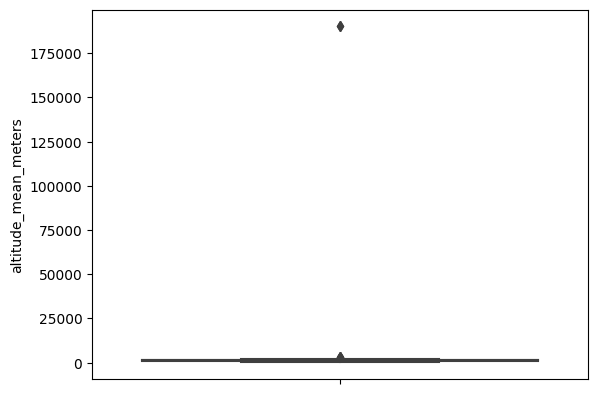

In [26]:


# outliers 

sns.boxplot(data= dataset, y= "altitude_mean_meters")

plt.show()



In [27]:
# drop rows with altitude > 10000,

dataset= dataset[~(dataset["altitude_mean_meters"] > 10000)]


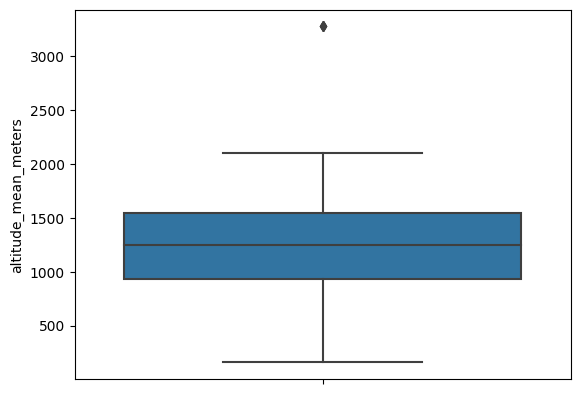

In [28]:
#updated boxplot 

sns.boxplot(data= dataset, y= "altitude_mean_meters")

plt.show()

In [29]:
## relationship Analysis

In [30]:
#heatmap
corelation = dataset.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_10828\66276087.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation = dataset.corr()


<AxesSubplot: >

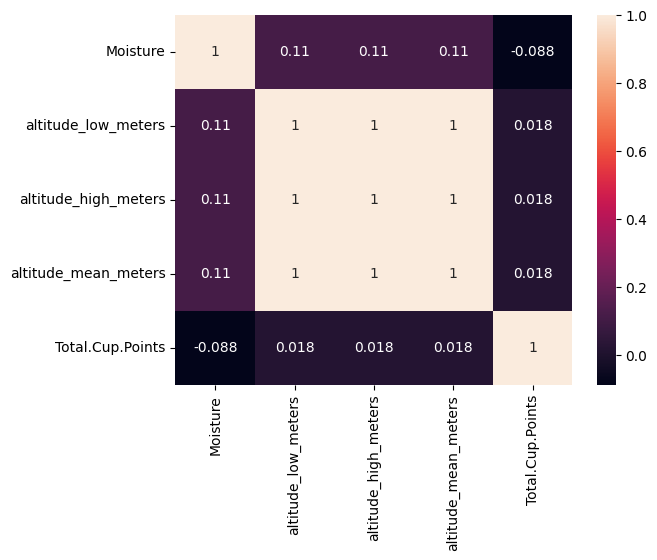

In [31]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

In [32]:
dataset.head()

,Species,Country.of.Origin,Variety,Processing.Method,Moisture,Color,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,Total.Cup.Points
29,Arabica,Taiwan,Sumatra,Pulped natural / honey,0.0,Green,m,1200.0,1200.0,1200.0,86.58
115,Arabica,Taiwan,Typica,Natural / Dry,0.0,Green,m,350.0,350.0,350.0,84.83
125,Arabica,El Salvador,Bourbon,Washed / Wet,0.0,Blue-Green,m,1350.0,1350.0,1350.0,84.67
128,Arabica,Costa Rica,Catuai,Washed / Wet,0.1,Blue-Green,m,1150.0,1150.0,1150.0,84.67
129,Arabica,Guatemala,Bourbon,Washed / Wet,0.1,Green,m,1600.0,1600.0,1600.0,84.67


In [33]:
data_score = dataset[['Variety', 'Processing.Method', 'Moisture', 'Color', 'altitude_low_meters', 'Total.Cup.Points']]

In [34]:
data_score.head()

,Variety,Processing.Method,Moisture,Color,altitude_low_meters,Total.Cup.Points
29,Sumatra,Pulped natural / honey,0.0,Green,1200.0,86.58
115,Typica,Natural / Dry,0.0,Green,350.0,84.83
125,Bourbon,Washed / Wet,0.0,Blue-Green,1350.0,84.67
128,Catuai,Washed / Wet,0.1,Blue-Green,1150.0,84.67
129,Bourbon,Washed / Wet,0.1,Green,1600.0,84.67


In [35]:
dataset_inspection(data_score)

Dimensions of the dataset (129, 6)
Duplicated rows 0
Null values Variety                0
Processing.Method      0
Moisture               0
Color                  0
altitude_low_meters    0
Total.Cup.Points       0
dtype: int64


In [36]:
data_score.groupby(['Variety', 'Processing.Method'])['Total.Cup.Points'].sum().to_frame().sort_values('Total.Cup.Points', ascending = False)

,,Total.Cup.Points
Variety,Processing.Method,
Bourbon,Washed / Wet,3120.88
Caturra,Washed / Wet,2072.85
Bourbon,Natural / Dry,1736.02
Catuai,Washed / Wet,657.26
Caturra,Natural / Dry,411.59
Typica,Washed / Wet,333.83
Pacas,Washed / Wet,331.00
Typica,Natural / Dry,249.83
Yellow Bourbon,Pulped natural / honey,248.66


Text(0, 0.5, 'Variety')

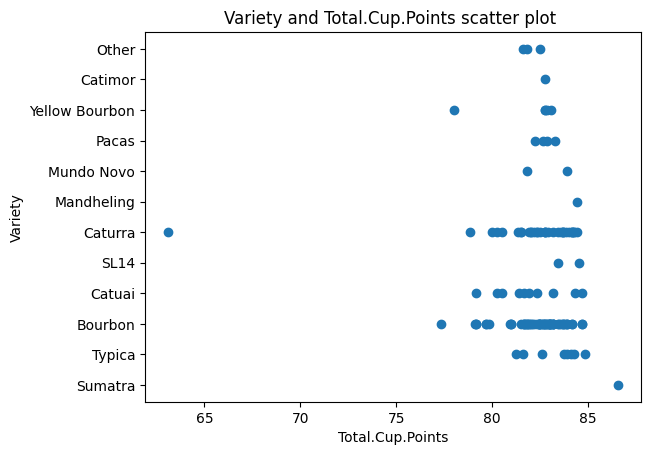

In [37]:
plt.scatter(data_score['Total.Cup.Points'], data_score['Variety']);

plt.title("Variety and Total.Cup.Points scatter plot ")
plt.xlabel('Total.Cup.Points')
plt.ylabel('Variety')

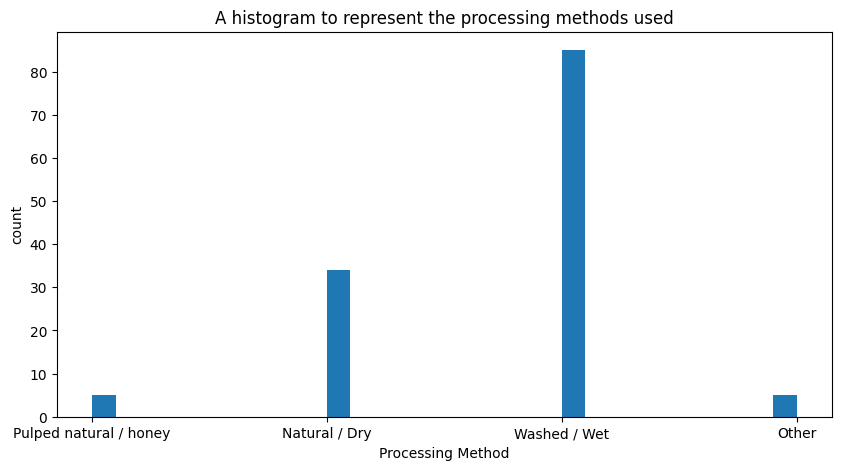

In [38]:
plt.figure(figsize=(10,5))
plt.hist(data_score['Processing.Method'], bins= 30)
plt.title("A histogram to represent the processing methods used")
plt.xlabel('Processing Method')
plt.ylabel('count')
plt.show()



# ML model

In [39]:
def train_test_evaluate(model_name, model, X_train, y_train, X_test, y_test):  

    model.fit(X_train, y_train)
    
    y_pred= model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    y_test_mean= y_test.mean()
    mae_ratio= mae/y_test_mean
    rmse_ratio= rmse/y_test_mean
    
    result_dataset = pd.DataFrame(
        data=[[model_name, mae, mse, rmse, r2, mae_ratio, rmse_ratio]], 
        columns=["Model", 'MAE', 'MSE', 'RMSE', 'R2 Score', "MAE Ratio", "RMSE Ratio"])
    return result_dataset

In [40]:
def test_evaluate_hyperparameter(model_name, model, X_test, y_test, y_train):  

    y_pred= model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    y_test_mean= y_test.mean()
    mae_ratio= mae/y_test_mean
    rmse_ratio= rmse/y_test_mean
    
    result_dataset = pd.DataFrame(
        data=[[model_name, mae, mse, rmse, r2, mae_ratio, rmse_ratio]], 
        columns=["Model", 'MAE', 'MSE', 'RMSE', 'R2 Score', "MAE Ratio", "RMSE Ratio"])
    
    return result_dataset

In [41]:
##Train and test sets


In [42]:
dataset_ml= pd.get_dummies(dataset)

In [43]:
X= dataset_ml.drop(columns= "Total.Cup.Points")
y= dataset_ml["Total.Cup.Points"]

In [44]:
##splitting

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.25, random_state= 8)

In [46]:
##scale data

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
##selecting the model

In [48]:
   ## elasticnet regression
    
    
el_model= ElasticNet()

result_dataset= train_test_evaluate("Elastic Net", el_model, X_train_scaled, y_train, X_test_scaled, y_test)
result_dataset

,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio
0,Elastic Net,1.288483,3.249182,1.802549,-0.286671,0.015579,0.021794


In [49]:
##KernelRidge

kernel_model= KernelRidge()
result_dataset_1= train_test_evaluate("Kernel Ridge", kernel_model, X_train_scaled, y_train, X_test_scaled, y_test)
result_dataset =result_dataset.append(result_dataset_1, ignore_index=True)
result_dataset= result_dataset.sort_values("RMSE Ratio", ignore_index= True)
result_dataset

C:\Users\HP\AppData\Local\Temp\ipykernel_10828\1349070956.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_dataset =result_dataset.append(result_dataset_1, ignore_index=True)


,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio
0,Elastic Net,1.288483,3.249182,1.802549,-0.286671,0.015579,0.021794
1,Kernel Ridge,83.243064,6934.896952,83.276029,-2745.208608,1.006478,1.006877


In [50]:
##svr

svr_model= SVR()

result_dataset_1= train_test_evaluate("SVR", svr_model, X_train_scaled, y_train, X_test_scaled, y_test)
result_dataset = result_dataset.append(result_dataset_1, ignore_index=True)
result_dataset= result_dataset.sort_values("RMSE Ratio", ignore_index= True)
result_dataset

C:\Users\HP\AppData\Local\Temp\ipykernel_10828\3997795176.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_dataset = result_dataset.append(result_dataset_1, ignore_index=True)


,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio
0,SVR,1.268454,2.460823,1.568701,0.025518,0.015337,0.018967
1,Elastic Net,1.288483,3.249182,1.802549,-0.286671,0.015579,0.021794
2,Kernel Ridge,83.243064,6934.896952,83.276029,-2745.208608,1.006478,1.006877


In [51]:
##GradientBoosting

gb_model= GradientBoostingRegressor()

result_dataset_1= train_test_evaluate("Gradient Boosting", gb_model, X_train_scaled, y_train, X_test_scaled, y_test)
result_dataset = result_dataset.append(result_dataset_1, ignore_index=True)
result_dataset= result_dataset.sort_values("RMSE Ratio", ignore_index= True)
result_dataset

C:\Users\HP\AppData\Local\Temp\ipykernel_10828\4238140551.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_dataset = result_dataset.append(result_dataset_1, ignore_index=True)


,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio
0,SVR,1.268454,2.460823,1.568701,0.025518,0.015337,0.018967
1,Elastic Net,1.288483,3.249182,1.802549,-0.286671,0.015579,0.021794
2,Gradient Boosting,2.098113,14.003695,3.742151,-4.545442,0.025368,0.045246
3,Kernel Ridge,83.243064,6934.896952,83.276029,-2745.208608,1.006478,1.006877


In [52]:
##RandomForest

rf_model= RandomForestRegressor()

result_dataset_1= train_test_evaluate("Random Forest", rf_model, X_train_scaled, y_train, X_test_scaled, y_test)
result_dataset = result_dataset.append(result_dataset_1, ignore_index=True)
result_dataset= result_dataset.sort_values("RMSE Ratio", ignore_index= True)
result_dataset

C:\Users\HP\AppData\Local\Temp\ipykernel_10828\972062815.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_dataset = result_dataset.append(result_dataset_1, ignore_index=True)


,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio
0,SVR,1.268454,2.460823,1.568701,0.025518,0.015337,0.018967
1,Elastic Net,1.288483,3.249182,1.802549,-0.286671,0.015579,0.021794
2,Random Forest,1.812213,6.899132,2.626620,-1.732046,0.021911,0.031758
3,Gradient Boosting,2.098113,14.003695,3.742151,-4.545442,0.025368,0.045246
4,Kernel Ridge,83.243064,6934.896952,83.276029,-2745.208608,1.006478,1.006877


In [53]:
##KNeighbors

knn_model= KNeighborsRegressor()

result_dataset_1= train_test_evaluate("KNN", knn_model, X_train_scaled, y_train, X_test_scaled, y_test)
result_dataset = result_dataset.append(result_dataset_1, ignore_index=True)
result_dataset= result_dataset.sort_values("RMSE Ratio", ignore_index= True)
result_dataset

C:\Users\HP\AppData\Local\Temp\ipykernel_10828\1274516783.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_dataset = result_dataset.append(result_dataset_1, ignore_index=True)


,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio
0,SVR,1.268454,2.460823,1.568701,0.025518,0.015337,0.018967
1,Elastic Net,1.288483,3.249182,1.802549,-0.286671,0.015579,0.021794
2,KNN,1.527515,3.585782,1.893616,-0.419964,0.018469,0.022895
3,Random Forest,1.812213,6.899132,2.626620,-1.732046,0.021911,0.031758
4,Gradient Boosting,2.098113,14.003695,3.742151,-4.545442,0.025368,0.045246
5,Kernel Ridge,83.243064,6934.896952,83.276029,-2745.208608,1.006478,1.006877


In [54]:
##DecisionTree

dt_model= DecisionTreeRegressor()

result_dataset_1= train_test_evaluate("Decision Tree", dt_model, X_train_scaled, y_train, X_test_scaled, y_test)
result_dataset =result_dataset.append(result_dataset_1, ignore_index=True)
result_dataset= result_dataset.sort_values("RMSE Ratio", ignore_index= True)
result_dataset

C:\Users\HP\AppData\Local\Temp\ipykernel_10828\854674847.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_dataset =result_dataset.append(result_dataset_1, ignore_index=True)


,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio
0,SVR,1.268454,2.460823,1.568701,0.025518,0.015337,0.018967
1,Elastic Net,1.288483,3.249182,1.802549,-0.286671,0.015579,0.021794
2,KNN,1.527515,3.585782,1.893616,-0.419964,0.018469,0.022895
3,Random Forest,1.812213,6.899132,2.626620,-1.732046,0.021911,0.031758
4,Gradient Boosting,2.098113,14.003695,3.742151,-4.545442,0.025368,0.045246
5,Decision Tree,2.548960,20.564702,4.534832,-7.143591,0.030819,0.054830
6,Kernel Ridge,83.243064,6934.896952,83.276029,-2745.208608,1.006478,1.006877


In [55]:
##rounding off

result_dataset.round(5)

,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio
0,SVR,1.26845,2.46082,1.56870,0.02552,0.01534,0.01897
1,Elastic Net,1.28848,3.24918,1.80255,-0.28667,0.01558,0.02179
2,KNN,1.52752,3.58578,1.89362,-0.41996,0.01847,0.02290
3,Random Forest,1.81221,6.89913,2.62662,-1.73205,0.02191,0.03176
4,Gradient Boosting,2.09811,14.00370,3.74215,-4.54544,0.02537,0.04525
5,Decision Tree,2.54896,20.56470,4.53483,-7.14359,0.03082,0.05483
6,Kernel Ridge,83.24306,6934.89695,83.27603,-2745.20861,1.00648,1.00688


In [56]:
## based on the output above, SVR, Elastic Net,KNN and Random Forest were the best perfoming models in that order

#   Hyperparameter Tuning


In [57]:
##       Elastic Net
##          Tuned 1

In [58]:
el_model= ElasticNet()

param_grid= {
    "alpha": [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
    "l1_ratio": [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
    "random_state": [8]
}

grid_model= GridSearchCV(estimator= el_model, param_grid= param_grid)

grid_model.fit(X_train_scaled, y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.548e+01, tolerance: 5.117e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.357e+02, tolerance: 5.295e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+00, tolerance: 5.239e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.392e-02, tolerance: 1.863e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
                         'l1_ratio': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
                         'random_state': [8]})

In [59]:
grid_model.best_params_

{'alpha': 1, 'l1_ratio': 0.7, 'random_state': 8}

In [60]:
result_dataset_1 = test_evaluate_hyperparameter("Elastic Net Tuned 1", grid_model, X_test_scaled, y_test, y_train)
result_dataset = result_dataset.append(result_dataset_1, ignore_index=True)
result_dataset = result_dataset.sort_values("RMSE Ratio", ignore_index= True)
result_dataset

C:\Users\HP\AppData\Local\Temp\ipykernel_10828\4049579724.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_dataset = result_dataset.append(result_dataset_1, ignore_index=True)


,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio
0,SVR,1.268454,2.460823,1.568701,0.025518,0.015337,0.018967
1,Elastic Net Tuned 1,1.256512,3.066272,1.751077,-0.214239,0.015192,0.021172
2,Elastic Net,1.288483,3.249182,1.802549,-0.286671,0.015579,0.021794
3,KNN,1.527515,3.585782,1.893616,-0.419964,0.018469,0.022895
4,Random Forest,1.812213,6.899132,2.626620,-1.732046,0.021911,0.031758
5,Gradient Boosting,2.098113,14.003695,3.742151,-4.545442,0.025368,0.045246
6,Decision Tree,2.548960,20.564702,4.534832,-7.143591,0.030819,0.054830
7,Kernel Ridge,83.243064,6934.896952,83.276029,-2745.208608,1.006478,1.006877


In [61]:
##Tuned 2

In [62]:
el_model= ElasticNet()

param_grid= {
    "alpha": [0.95, 0.98, 1, 1.2],
    "l1_ratio": [0.009, 0.01, 0.02, 0.05],
    "random_state": [8]
}

grid_model= GridSearchCV(estimator= el_model, param_grid= param_grid)

grid_model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [0.95, 0.98, 1, 1.2],
                         'l1_ratio': [0.009, 0.01, 0.02, 0.05],
                         'random_state': [8]})

In [63]:
grid_model.best_params_

{'alpha': 1.2, 'l1_ratio': 0.05, 'random_state': 8}

In [64]:
result_dataset_1= test_evaluate_hyperparameter("Elastic Net Tuned 2", grid_model, X_test_scaled, y_test, y_train)
result_dataset = result_dataset.append(result_dataset_1, ignore_index=True)
result_dataset= result_dataset.sort_values("RMSE Ratio", ignore_index= True)
result_dataset


C:\Users\HP\AppData\Local\Temp\ipykernel_10828\835499935.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_dataset = result_dataset.append(result_dataset_1, ignore_index=True)


,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio
0,SVR,1.268454,2.460823,1.568701,0.025518,0.015337,0.018967
1,Elastic Net Tuned 1,1.256512,3.066272,1.751077,-0.214239,0.015192,0.021172
2,Elastic Net Tuned 2,1.314953,3.090725,1.758046,-0.223922,0.015899,0.021256
3,Elastic Net,1.288483,3.249182,1.802549,-0.286671,0.015579,0.021794
4,KNN,1.527515,3.585782,1.893616,-0.419964,0.018469,0.022895
5,Random Forest,1.812213,6.899132,2.626620,-1.732046,0.021911,0.031758
6,Gradient Boosting,2.098113,14.003695,3.742151,-4.545442,0.025368,0.045246
7,Decision Tree,2.548960,20.564702,4.534832,-7.143591,0.030819,0.054830
8,Kernel Ridge,83.243064,6934.896952,83.276029,-2745.208608,1.006478,1.006877


In [65]:
##SVR

#Tuned 1

In [66]:
svr_model= SVR()

param_grid= {
    "kernel": ["linear", "poly", "rbf"],
    "degree": [1, 2, 3],
    "C": [0.1, 1, 2],
    "epsilon": [0.1, 0.5, 1, 2]
}

grid_model= GridSearchCV(estimator= svr_model, param_grid= param_grid)

grid_model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 2], 'degree': [1, 2, 3],
                         'epsilon': [0.1, 0.5, 1, 2],
                         'kernel': ['linear', 'poly', 'rbf']})

In [67]:
grid_model.best_params_

{'C': 1, 'degree': 1, 'epsilon': 0.1, 'kernel': 'poly'}

In [68]:
result_dataset_1= test_evaluate_hyperparameter("SVR Tuned 1", grid_model, X_test_scaled, y_test, y_train)
result_dataset = result_dataset.append(result_dataset_1, ignore_index=True)
result_dataset = result_dataset.sort_values("RMSE Ratio", ignore_index= True)
result_dataset

C:\Users\HP\AppData\Local\Temp\ipykernel_10828\1038649866.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_dataset = result_dataset.append(result_dataset_1, ignore_index=True)


,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio
0,SVR Tuned 1,1.263963,2.436806,1.561027,0.035028,0.015282,0.018874
1,SVR,1.268454,2.460823,1.568701,0.025518,0.015337,0.018967
2,Elastic Net Tuned 1,1.256512,3.066272,1.751077,-0.214239,0.015192,0.021172
3,Elastic Net Tuned 2,1.314953,3.090725,1.758046,-0.223922,0.015899,0.021256
4,Elastic Net,1.288483,3.249182,1.802549,-0.286671,0.015579,0.021794
5,KNN,1.527515,3.585782,1.893616,-0.419964,0.018469,0.022895
6,Random Forest,1.812213,6.899132,2.626620,-1.732046,0.021911,0.031758
7,Gradient Boosting,2.098113,14.003695,3.742151,-4.545442,0.025368,0.045246
8,Decision Tree,2.548960,20.564702,4.534832,-7.143591,0.030819,0.054830
9,Kernel Ridge,83.243064,6934.896952,83.276029,-2745.208608,1.006478,1.006877


In [69]:
#Tuned 2

In [70]:
svr_model= SVR()

param_grid= {
    "kernel": ["rbf"],
    "C": [1.5, 2, 3, 5],
    "epsilon": [0.9, 1, 1.1, 1.5]
}

grid_model= GridSearchCV(estimator= svr_model, param_grid= param_grid)

grid_model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1.5, 2, 3, 5], 'epsilon': [0.9, 1, 1.1, 1.5],
                         'kernel': ['rbf']})

In [71]:
grid_model.best_params_

{'C': 1.5, 'epsilon': 0.9, 'kernel': 'rbf'}

In [72]:
result_dataset_1= test_evaluate_hyperparameter("SVR Tuned 2", grid_model, X_test_scaled, y_test, y_train)
result_dataset = result_dataset.append(result_dataset_1, ignore_index=True)
result_dataset= result_dataset.sort_values("RMSE Ratio", ignore_index= True)
result_dataset

C:\Users\HP\AppData\Local\Temp\ipykernel_10828\157881381.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_dataset = result_dataset.append(result_dataset_1, ignore_index=True)


,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio
0,SVR Tuned 1,1.263963,2.436806,1.561027,0.035028,0.015282,0.018874
1,SVR,1.268454,2.460823,1.568701,0.025518,0.015337,0.018967
2,SVR Tuned 2,1.305154,2.615569,1.617272,-0.035761,0.015780,0.019554
3,Elastic Net Tuned 1,1.256512,3.066272,1.751077,-0.214239,0.015192,0.021172
4,Elastic Net Tuned 2,1.314953,3.090725,1.758046,-0.223922,0.015899,0.021256
5,Elastic Net,1.288483,3.249182,1.802549,-0.286671,0.015579,0.021794
6,KNN,1.527515,3.585782,1.893616,-0.419964,0.018469,0.022895
7,Random Forest,1.812213,6.899132,2.626620,-1.732046,0.021911,0.031758
8,Gradient Boosting,2.098113,14.003695,3.742151,-4.545442,0.025368,0.045246
9,Decision Tree,2.548960,20.564702,4.534832,-7.143591,0.030819,0.054830


In [73]:
##Random Forest
##Tuned 1

In [74]:
rf_model= RandomForestRegressor()

param_grid= {
    "n_estimators": list(range(40, 120, 20)),
    "max_depth": list(range(2, 11, 2)),
    "min_samples_leaf": list(range(1, 5)),
    "random_state": [8]
}

grid_model= GridSearchCV(estimator= rf_model, param_grid= param_grid)

grid_model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'n_estimators': [40, 60, 80, 100],
                         'random_state': [8]})

In [75]:
grid_model.best_params_

{'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 60, 'random_state': 8}

In [76]:
result_dataset_1 = test_evaluate_hyperparameter("Random Forest Tuned 1", grid_model, X_test_scaled, y_test, y_train)
result_dataset = result_dataset.append(result_dataset_1, ignore_index=True)
result_dataset = result_dataset.sort_values("RMSE Ratio", ignore_index= True)
result_dataset

C:\Users\HP\AppData\Local\Temp\ipykernel_10828\1094273510.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_dataset = result_dataset.append(result_dataset_1, ignore_index=True)


,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio
0,Random Forest Tuned 1,1.215441,2.407867,1.551730,0.046489,0.014696,0.018762
1,SVR Tuned 1,1.263963,2.436806,1.561027,0.035028,0.015282,0.018874
2,SVR,1.268454,2.460823,1.568701,0.025518,0.015337,0.018967
3,SVR Tuned 2,1.305154,2.615569,1.617272,-0.035761,0.015780,0.019554
4,Elastic Net Tuned 1,1.256512,3.066272,1.751077,-0.214239,0.015192,0.021172
5,Elastic Net Tuned 2,1.314953,3.090725,1.758046,-0.223922,0.015899,0.021256
6,Elastic Net,1.288483,3.249182,1.802549,-0.286671,0.015579,0.021794
7,KNN,1.527515,3.585782,1.893616,-0.419964,0.018469,0.022895
8,Random Forest,1.812213,6.899132,2.626620,-1.732046,0.021911,0.031758
9,Gradient Boosting,2.098113,14.003695,3.742151,-4.545442,0.025368,0.045246


In [77]:
#Tuned 2

In [78]:
rf_model= RandomForestRegressor()

param_grid= {
    "n_estimators": list(range(130, 160, 10)),
    "max_depth": list(range(10, 20, 2)),
    "min_samples_leaf": list(range(2, 7, 2)),
    "random_state": [8]
}

grid_model= GridSearchCV(estimator= rf_model, param_grid= param_grid)

grid_model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 12, 14, 16, 18],
                         'min_samples_leaf': [2, 4, 6],
                         'n_estimators': [130, 140, 150], 'random_state': [8]})

In [79]:
grid_model.best_params_

{'max_depth': 10,
 'min_samples_leaf': 6,
 'n_estimators': 140,
 'random_state': 8}

In [80]:
result_dataset_1 = test_evaluate_hyperparameter("Random Forest Tuned 2", grid_model, X_test_scaled, y_test, y_train)
result_dataset = result_dataset.append(result_dataset_1, ignore_index=True)
result_dataset = result_dataset.sort_values("RMSE Ratio", ignore_index= True)
result_dataset
                               

C:\Users\HP\AppData\Local\Temp\ipykernel_10828\1378130736.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_dataset = result_dataset.append(result_dataset_1, ignore_index=True)


,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio
0,Random Forest Tuned 1,1.215441,2.407867,1.551730,0.046489,0.014696,0.018762
1,SVR Tuned 1,1.263963,2.436806,1.561027,0.035028,0.015282,0.018874
2,SVR,1.268454,2.460823,1.568701,0.025518,0.015337,0.018967
3,SVR Tuned 2,1.305154,2.615569,1.617272,-0.035761,0.015780,0.019554
4,Elastic Net Tuned 1,1.256512,3.066272,1.751077,-0.214239,0.015192,0.021172
5,Elastic Net Tuned 2,1.314953,3.090725,1.758046,-0.223922,0.015899,0.021256
6,Elastic Net,1.288483,3.249182,1.802549,-0.286671,0.015579,0.021794
7,Random Forest Tuned 2,1.495222,3.473529,1.863741,-0.375512,0.018078,0.022534
8,KNN,1.527515,3.585782,1.893616,-0.419964,0.018469,0.022895
9,Random Forest,1.812213,6.899132,2.626620,-1.732046,0.021911,0.031758


In [81]:
df = pd.DataFrame(grid_model.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.809489,0.032101,0.028128,0.006252,10,2,130,8,"{'max_depth': 10, 'min_samples_leaf': 2, 'n_es...",-0.396109,0.057770,-0.362166,-0.047575,-0.168996,-0.183415,0.175512,22
1,0.848353,0.041598,0.037499,0.007655,10,2,140,8,"{'max_depth': 10, 'min_samples_leaf': 2, 'n_es...",-0.385124,0.055192,-0.378014,-0.047643,-0.139315,-0.178981,0.176505,16
2,0.978653,0.032503,0.037503,0.007655,10,2,150,8,"{'max_depth': 10, 'min_samples_leaf': 2, 'n_es...",-0.391949,0.064241,-0.408737,-0.047690,-0.167974,-0.190422,0.186550,26
3,0.831192,0.051392,0.037502,0.007653,10,4,130,8,"{'max_depth': 10, 'min_samples_leaf': 4, 'n_es...",-0.279168,-0.051263,-0.308250,-0.044290,-0.682664,-0.273127,0.232629,41
4,1.002500,0.263087,0.042975,0.010488,10,4,140,8,"{'max_depth': 10, 'min_samples_leaf': 4, 'n_es...",-0.278887,-0.049941,-0.301560,-0.045882,-0.611940,-0.257642,0.207793,31
5,1.293227,0.727136,0.046879,0.013977,10,4,150,8,"{'max_depth': 10, 'min_samples_leaf': 4, 'n_es...",-0.274881,-0.039492,-0.298031,-0.043603,-0.634235,-0.258049,0.217785,36
6,0.768554,0.069584,0.046878,0.009882,10,6,130,8,"{'max_depth': 10, 'min_samples_leaf': 6, 'n_es...",-0.162501,-0.025732,-0.342325,-0.048208,-0.209618,-0.157677,0.115073,11
7,0.775051,0.015937,0.037503,0.007654,10,6,140,8,"{'max_depth': 10, 'min_samples_leaf': 6, 'n_es...",-0.169661,-0.014189,-0.328467,-0.050991,-0.183882,-0.149438,0.111023,1
8,0.907001,0.144836,0.040626,0.012499,10,6,150,8,"{'max_depth': 10, 'min_samples_leaf': 6, 'n_es...",-0.173448,-0.019124,-0.332975,-0.049604,-0.188018,-0.152634,0.111936,6
9,0.753599,0.009226,0.031249,0.000002,12,2,130,8,"{'max_depth': 12, 'min_samples_leaf': 2, 'n_es...",-0.397674,0.054890,-0.360768,-0.047250,-0.166058,-0.183372,0.174924,21


In [82]:
result_dataset_viz= result_dataset[~result_dataset["Model"].isin(["Kernel Ridge", "SGD", "Decision Tree"])]
result_dataset_viz= result_dataset_viz.set_index("Model")
result_dataset_viz["Neg R2 Score"]= -result_dataset_viz["R2 Score"]

result_dataset_viz= result_dataset_viz[['MAE', 'MSE', 'RMSE', 'Neg R2 Score', 'MAE Ratio', 'RMSE Ratio']]

scaler= MinMaxScaler((0, 100))
result_dataset_viz_scaled= scaler.fit_transform(result_dataset_viz)

result_dataset_viz_scaled= pd.DataFrame(result_dataset_viz_scaled, index= result_dataset_viz.index, columns= result_dataset_viz.columns)

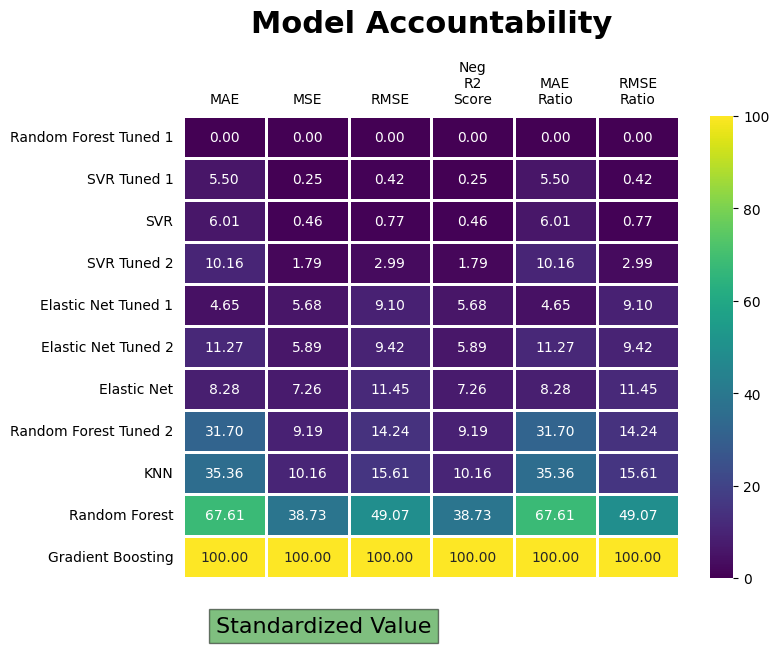

In [83]:
import textwrap
plt.figure(figsize= (8, 6))
cmap ='viridis'
ax= sns.heatmap(result_dataset_viz_scaled, annot=True, fmt=".2f", cmap=cmap, linewidths= 1)

ax.xaxis.tick_top()
ax.set_xticklabels([textwrap.fill(e, 5) for e in result_dataset_viz_scaled.columns])
ax.tick_params(left=False, top=False)

plt.title("Model Accountability", fontsize= 22, fontweight= "bold", pad= 20)
plt.figtext(0.3, 0.02, "Standardized Value", ha="center", fontsize= 16, bbox={"facecolor":"green", "alpha":0.5, "pad":5})
plt.ylabel("")

plt.show()



In [84]:
corelation_1 =result_dataset_viz.corr()

<AxesSubplot: >

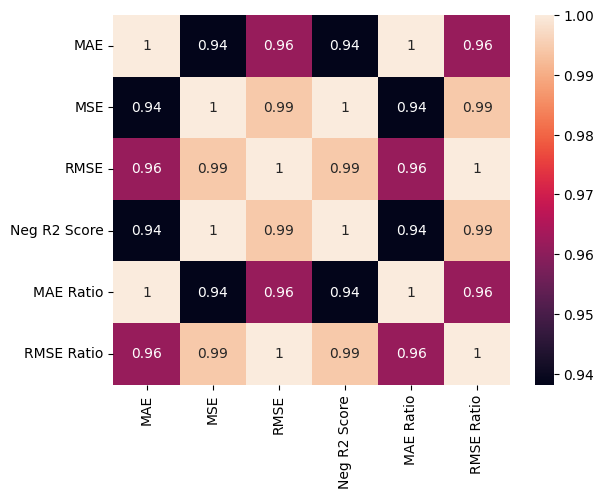

In [85]:
sns.heatmap(corelation_1, xticklabels=corelation_1.columns, yticklabels=corelation_1.columns, annot=True)


In [86]:
rf_model= RandomForestRegressor(
    max_depth= 10,
    min_samples_leaf= 2,
    n_estimators= 140,
    random_state= 8)

rf_model.fit(X_train_scaled, y_train)

y_pred= rf_model.predict(X_test_scaled)

In [87]:
prediction_df= pd.DataFrame(data= [y_test.values, y_pred])

prediction_df= prediction_df.transpose()
prediction_df.columns= ["y_true", "y_pred"]
prediction_df= prediction_df.round(2)
prediction_df["diff"]= prediction_df["y_true"] - prediction_df["y_pred"]
prediction_df.head()

,y_true,y_pred,diff
0,83.67,79.27,4.40
1,79.17,82.71,-3.54
2,84.08,82.81,1.27
3,83.92,82.87,1.05
4,84.17,82.27,1.90


In [88]:
df = pd.DataFrame(grid_model.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.809489,0.032101,0.028128,0.006252,10,2,130,8,"{'max_depth': 10, 'min_samples_leaf': 2, 'n_es...",-0.396109,0.057770,-0.362166,-0.047575,-0.168996,-0.183415,0.175512,22
1,0.848353,0.041598,0.037499,0.007655,10,2,140,8,"{'max_depth': 10, 'min_samples_leaf': 2, 'n_es...",-0.385124,0.055192,-0.378014,-0.047643,-0.139315,-0.178981,0.176505,16
2,0.978653,0.032503,0.037503,0.007655,10,2,150,8,"{'max_depth': 10, 'min_samples_leaf': 2, 'n_es...",-0.391949,0.064241,-0.408737,-0.047690,-0.167974,-0.190422,0.186550,26
3,0.831192,0.051392,0.037502,0.007653,10,4,130,8,"{'max_depth': 10, 'min_samples_leaf': 4, 'n_es...",-0.279168,-0.051263,-0.308250,-0.044290,-0.682664,-0.273127,0.232629,41
4,1.002500,0.263087,0.042975,0.010488,10,4,140,8,"{'max_depth': 10, 'min_samples_leaf': 4, 'n_es...",-0.278887,-0.049941,-0.301560,-0.045882,-0.611940,-0.257642,0.207793,31
5,1.293227,0.727136,0.046879,0.013977,10,4,150,8,"{'max_depth': 10, 'min_samples_leaf': 4, 'n_es...",-0.274881,-0.039492,-0.298031,-0.043603,-0.634235,-0.258049,0.217785,36
6,0.768554,0.069584,0.046878,0.009882,10,6,130,8,"{'max_depth': 10, 'min_samples_leaf': 6, 'n_es...",-0.162501,-0.025732,-0.342325,-0.048208,-0.209618,-0.157677,0.115073,11
7,0.775051,0.015937,0.037503,0.007654,10,6,140,8,"{'max_depth': 10, 'min_samples_leaf': 6, 'n_es...",-0.169661,-0.014189,-0.328467,-0.050991,-0.183882,-0.149438,0.111023,1
8,0.907001,0.144836,0.040626,0.012499,10,6,150,8,"{'max_depth': 10, 'min_samples_leaf': 6, 'n_es...",-0.173448,-0.019124,-0.332975,-0.049604,-0.188018,-0.152634,0.111936,6
9,0.753599,0.009226,0.031249,0.000002,12,2,130,8,"{'max_depth': 12, 'min_samples_leaf': 2, 'n_es...",-0.397674,0.054890,-0.360768,-0.047250,-0.166058,-0.183372,0.174924,21


C:\Users\HP\AppData\Local\Temp\ipykernel_10828\3339580719.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax= sns.scatterplot(data= prediction_df, x= "y_pred", y= "y_true", palette= ["#233773"], linewidth=0, alpha = 0.7)


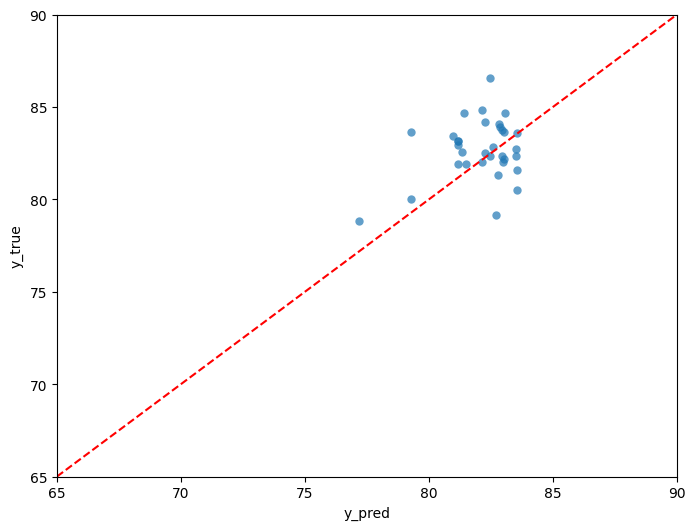

In [89]:
plt.figure(figsize= (8, 6))

ax= sns.scatterplot(data= prediction_df, x= "y_pred", y= "y_true", palette= ["#233773"], linewidth=0, alpha = 0.7)

ax.axline((1, 1), slope=1, color = "red", linestyle= "--")

plt.xlim(65, 90)
plt.ylim(65, 90)

plt.show()

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize= (14, 6))

sns.scatterplot(data= prediction_df, x= "y_true", y= "diff",linewidth=0, alpha = 0.7, ax= ax[0], zorder= 5)
ax[0].set_xlim(65, 90)
ax[0].set_ylim(-6, 6)
ax[0].axhline(y= 0, color= "red")

ax[0].axhline(prediction_df["diff"].min(), linestyle= ":", linewidth= 3, color= "grey", alpha=0.5)
ax[0].axhline(prediction_df["diff"].max(), linestyle= ":", linewidth= 3, color= "grey", alpha=0.5)
ax[0].axhspan(prediction_df["diff"].min(), prediction_df["diff"].max(), facecolor='grey', alpha=0.1, zorder= 0)
ax[0].text(x= 70, y= 3, s= "Error Range", color='black', ha="center", va="center", fontstretch= "normal",
           alpha= 1, fontsize= 14, bbox= dict(facecolor='red', alpha= 0.3, boxstyle="round"))

sns.histplot(data= prediction_df, x= "diff", binwidth=0.5, kde= True, ax= ax[1], zorder= 5)
ax[1].set_xlim(-6, 6)
ax[1].set_ylim(0, 25)
ax[1].set_yticks(list(range(0, 30, 5)))

ax[1].axvline(prediction_df["diff"].min(), linestyle= ":", linewidth= 3, color= "grey", alpha=0.5)
ax[1].axvline(prediction_df["diff"].max(), linestyle= ":", linewidth= 3, color= "grey", alpha=0.5)
ax[1].axvspan(prediction_df["diff"].min(), prediction_df["diff"].max(), facecolor='grey', alpha=0.1, zorder= 0)
ax[1].text(x= -3, y= 22.5, s= "Error Range", color='black', ha="center", va="center", fontstretch= "normal",
           alpha= 1, fontsize= 14, bbox= dict(facecolor='red', alpha= 0.3, boxstyle="round"))

plt.suptitle("Residual Plot and Histogram", fontsize= 22, fontweight= "bold", y= 1.05)

for i in [0, 1]:
    ax[i].set_ylabel(ax[i].yaxis.get_label().get_text().title().replace("_", " "), fontsize= 12, fontweight= "bold")
    ax[i].set_xlabel(ax[i].xaxis.get_label().get_text().title().replace("_", " "), fontsize= 12, fontweight= "bold")
    ax[i].grid(axis='y', color='black', linestyle=':', dashes=(2,7), alpha= 0.5, zorder= 0)
    
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    
plt.tight_layout()
# plt.savefig("residual_plot.png", facecolor='w', edgecolor='w', transparent=False, bbox_inches="tight")
plt.show()